# Analyzing Sales Data of a National Store-Explanatory Data Analysis (EDA)

In [1]:
# Installing packages not available in the environment
!pip install matplotlib

In [2]:
!pip install folium

In [15]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import folium
import os
import warnings
import math
warnings.filterwarnings('ignore')

In [5]:
clean_df = pd.read_csv('./data/clean_data.csv',index_col=None)

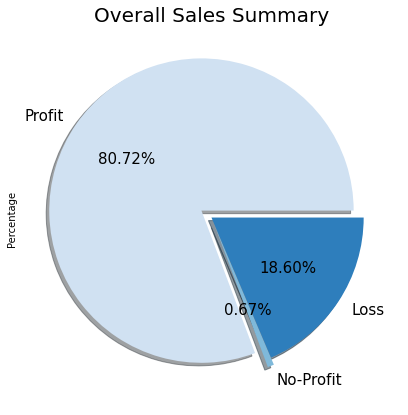

In [18]:
# Plotting Overall Sales Summary
summary = pd.DataFrame({'Profit':clean_df.quantity[clean_df.profit > 0].sum(), 
                        'No-Profit':clean_df.quantity[clean_df.profit == 0].sum(), 
                        'Loss':clean_df.quantity[(clean_df.profit) < 0].sum()},
                       index={'Count'}).T
plt.figure(figsize=(10,7))
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(summary)))
plt.title('Overall Sales Summary', fontsize=20)
summary.Count.plot.pie(autopct='%1.2f%%',figsize=(7,7), label='Percentage', 
                       textprops = {"fontsize":15}, shadow=True, explode=(0.08,0.05,0),
                       colors = colors)
plt.savefig("Overall_Sales_Summary.png")
plt.show()

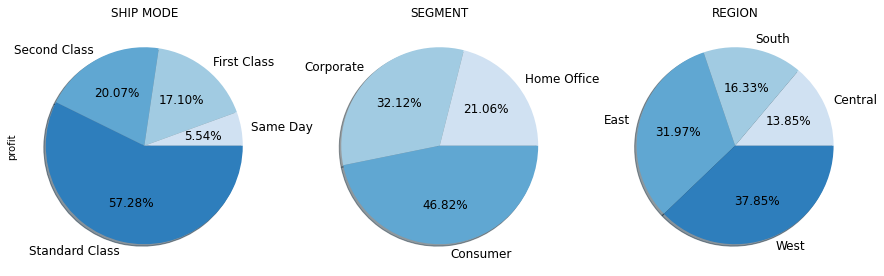

In [7]:
# Plotting Shipmode, Segment, and Region-wise profit
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, 4))
prof_S = pd.DataFrame(clean_df.groupby('ship_mode').sum()).sort_values('profit')
prof_G = pd.DataFrame(clean_df.groupby('segment').sum()).sort_values('profit')
prof_R = pd.DataFrame(clean_df.groupby('region').sum()).sort_values('profit')
fig, ax = plt.subplots(1,3, figsize=(15,6))
ax[0].set_title('SHIP MODE', fontsize=12)
ax[1].set_title('SEGMENT', fontsize=12)
ax[2].set_title('REGION', fontsize=12)
prof_S.profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":12}, shadow=True, 
                                                       ax=ax[0], colors = colors )
prof_G.profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":12}, shadow=True, 
                                                        ax=ax[1],ylabel = '', colors = colors)
prof_R.profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":12}, shadow=True, 
                                                       ax=ax[2],ylabel = '', colors = colors)
plt.show()

In [8]:
state_div_df = clean_df.groupby('state').sum().sort_values('profit', ascending=False)

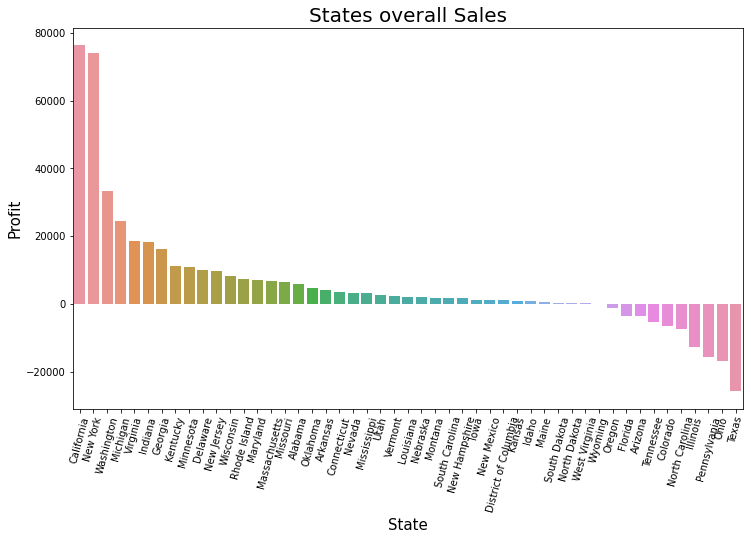

In [21]:
# Plotting States overall Sales
plt.figure(figsize=(12,7))
plt.title("States overall Sales", fontsize=20)
sns.barplot(state_div_df.index, state_div_df.profit)
plt.xticks(rotation=75)
plt.xlabel("State", fontsize=15)
plt.ylabel("Profit", fontsize=15)
plt.savefig("Bargraph_of_Profit_for_States.png")
plt.show()

In [100]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [101]:
new_state_df = state_div_df.reset_index()

In [102]:
def get_state_code (state_name):
    return us_state_to_abbrev[state_name]

In [103]:
new_state_df = new_state_df.assign(code=new_state_df["state"].apply(get_state_code))

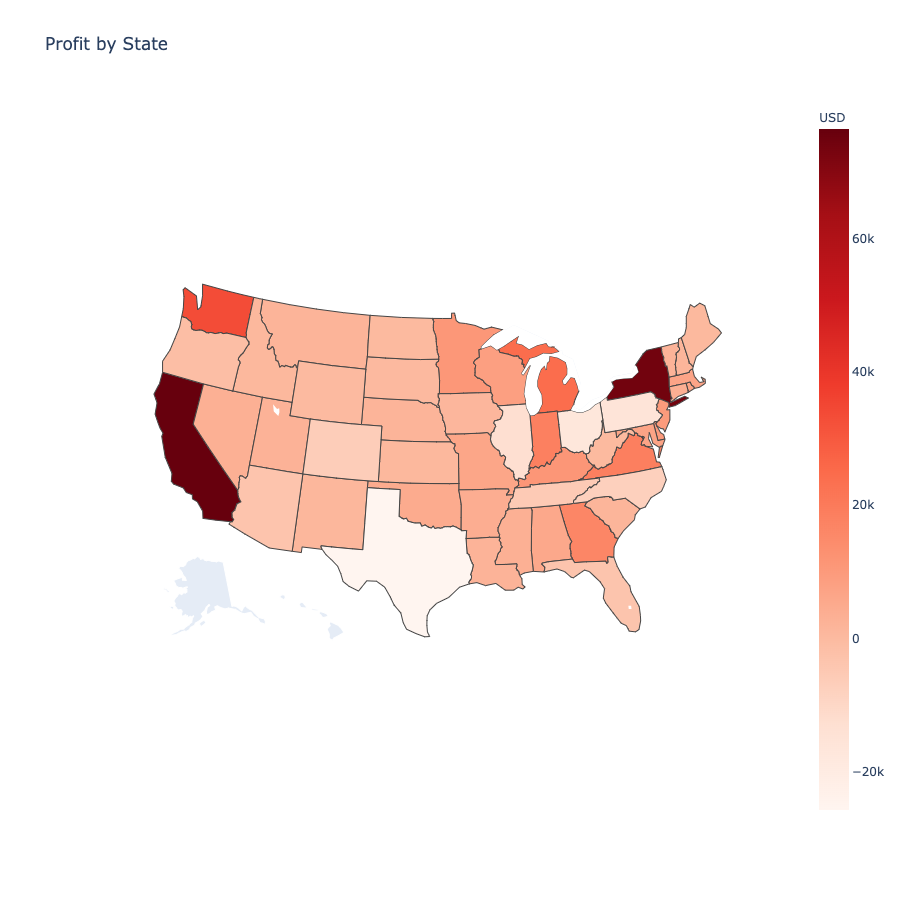

In [104]:
fig = go.Figure(data=go.Choropleth(
    locations=new_state_df['code'], # Spatial coordinates
    z = new_state_df['profit'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "USD",
))

fig.update_layout(
    title_text = 'Profit by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [105]:
state_geo = os.path.join("data", "us-states.json")

In [106]:
fig = go.Figure(data=go.Choropleth(
    locations=new_state_df['code'], # Spatial coordinates
    z = new_state_df['profit'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "USD",
))

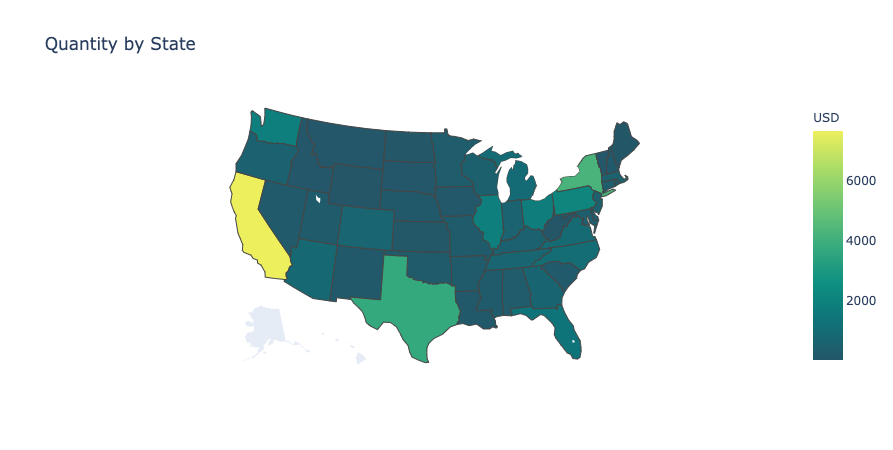

In [107]:
fig = go.Figure(data=go.Choropleth(
    locations=new_state_df['code'], # Spatial coordinates
    z = new_state_df['quantity'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'aggrnyl',
    colorbar_title = "USD",
))

fig.update_layout(
    title_text = 'Quantity by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

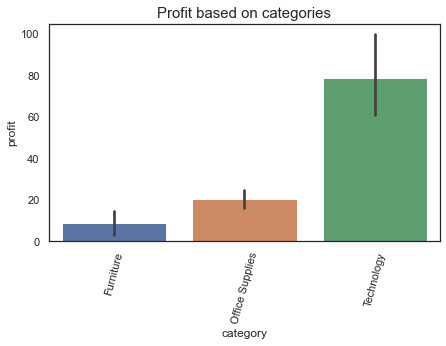

In [108]:
plt.figure(figsize=(7,4))
plt.title("Profit based on categories", fontsize=15)
sns.barplot(clean_df.category, clean_df.profit)
sns.set(style="white", palette='deep')#, palette='deep', 
            #font='sans-serif', font_scale=1, color_codes=False, rc=None)
plt.xticks(rotation=75, fontsize=11)
plt.show()

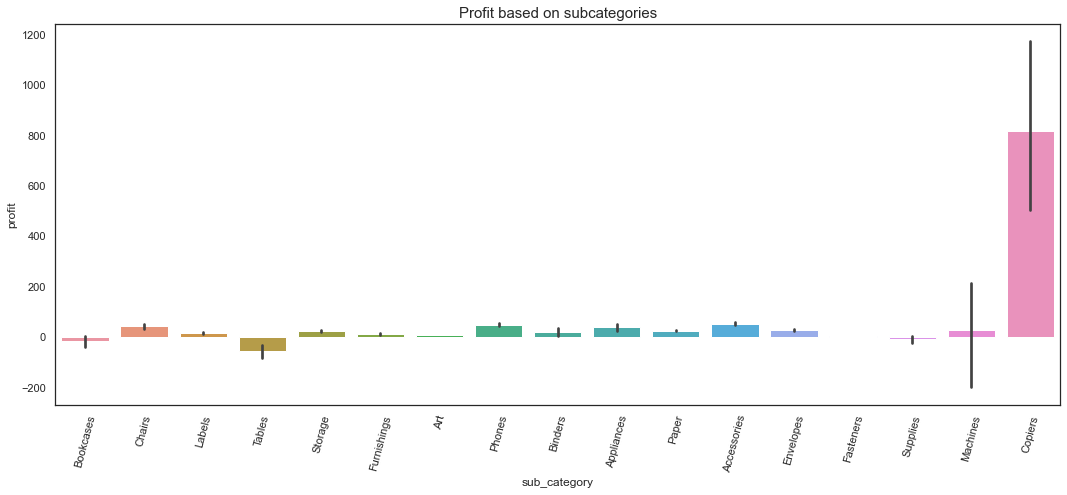

In [109]:
plt.figure(figsize=(18,7))
plt.title("Profit based on subcategories", fontsize=15)
sns.barplot(clean_df.sub_category, clean_df.profit)
plt.xticks(rotation=75)
plt.show()

In [110]:
# feature engineering price_to_sales ratio
new_state_df['profit_to_sales'] = new_state_df['profit'] / new_state_df['sales']

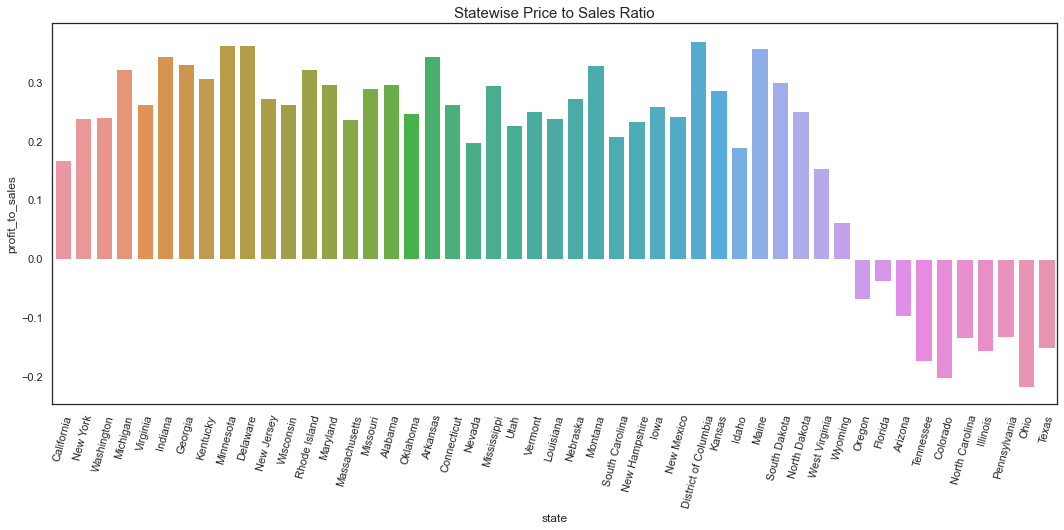

In [111]:
plt.figure(figsize=(18,7))
plt.title("Statewise Price to Sales Ratio", fontsize=15)
sns.barplot(new_state_df.state, new_state_df.profit_to_sales)
plt.xticks(rotation=75)
plt.show()

In [112]:
max_index = int(new_state_df[new_state_df['profit_to_sales']==max(new_state_df.profit_to_sales)].index.values)
min_index = int(new_state_df[new_state_df['profit_to_sales']==min(new_state_df.profit_to_sales)].index.values)

In [113]:
print(f"The state of {new_state_df.iloc[max_index]['state']} has the highest profit to sale of {round(max(new_state_df.profit_to_sales),3)}.")
print(f"The state of {new_state_df.iloc[min_index]['state']} has the lowest profit to sale of {round(min(new_state_df.profit_to_sales),3)}.")

The state of District of Columbia has the highest profit to sale of 0.37.
The state of Ohio has the lowest profit to sale of -0.217.


In [114]:
cat = clean_df.groupby('category').sum().iloc[:,2].sort_values().to_frame('Count')

In [115]:
sub_cat = clean_df.groupby('sub_category').sum().iloc[:,2].sort_values().to_frame('Count')

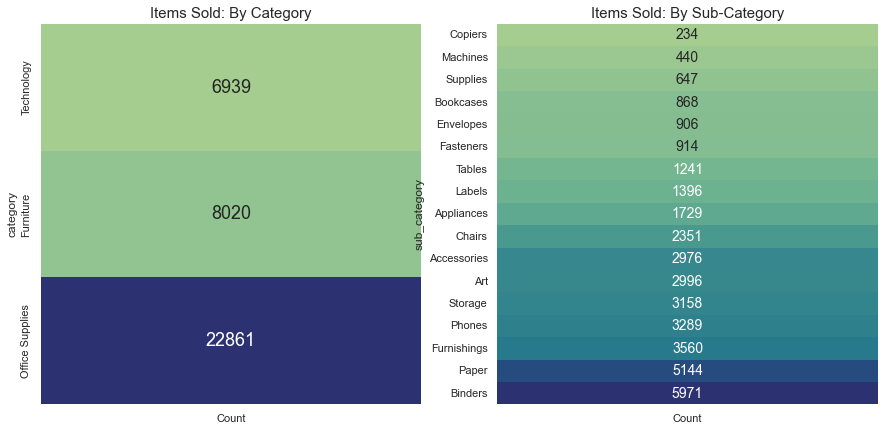

In [116]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].set_title('Items Sold: By Category', fontsize=15)
ax[1].set_title('Items Sold: By Sub-Category', fontsize=15)
sns.heatmap(cat, ax=ax[0], cbar=False, annot=True, cmap='crest', fmt='2', annot_kws={'size':18})
sns.heatmap(sub_cat, ax=ax[1], annot=True, cbar=False, cmap='crest', fmt='2', annot_kws={'size':14})
plt.show()
plt.show()

In [117]:
off_sup_los_angeles = clean_df[(clean_df.category == 'Office Supplies') & (clean_df.city == 'Los Angeles')]

In [118]:
los_sub_cat = off_sup_los_angeles.groupby('sub_category').sum().iloc[:,2].sort_values().to_frame('Count')

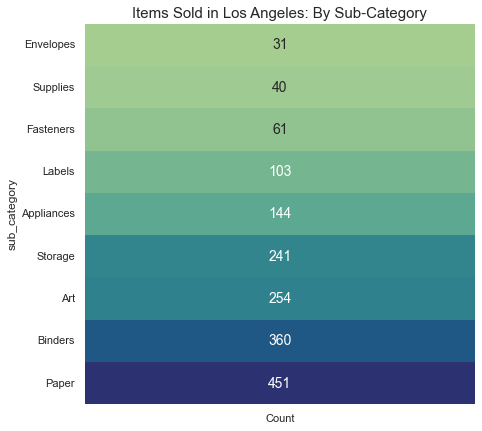

In [119]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(los_sub_cat, annot=True, cbar=False, cmap='crest', fmt='2', annot_kws={'size':14})
ax.set_title('Items Sold in Los Angeles: By Sub-Category', fontsize=15)
plt.show()